In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import json
from functools import reduce

from Processing import Processing

## Plotting value frequencies

In [2]:
arguments = pd.read_csv('../data/arguments.tsv', sep='\t', header=0)
values = Processing.parse_value_file('../data/values.json')
value_name_list = Processing.get_values_dict(values)
labels_level1 = pd.read_csv('../data/labels-level1.tsv', sep='\t', header=0)
labels_level2 = pd.read_csv('../data/labels-level2.tsv', sep='\t', header=0)
labels_level3 = pd.read_csv('../data/labels-level3.tsv', sep='\t', header=0)
labels_level4a = pd.read_csv('../data/labels-level4a.tsv', sep='\t', header=0)
labels_level4b = pd.read_csv('../data/labels-level4b.tsv', sep='\t', header=0)

test_arguments = arguments.loc[arguments["Usage"] == "test"]

test_arguments_with_labels = reduce(lambda left, right: pd.merge(left, right, on='Argument ID', how='inner'),
                        [test_arguments, labels_level1, labels_level2, labels_level3, labels_level4a, labels_level4b])

In [3]:
usa_test_labels = test_arguments_with_labels[test_arguments_with_labels["Part"] == "usa"]
india_test_labels = test_arguments_with_labels[test_arguments_with_labels["Part"] == "india"]
china_test_labels = test_arguments_with_labels[test_arguments_with_labels["Part"] == "china"]
africa_test_labels = test_arguments_with_labels[test_arguments_with_labels["Part"] == "africa"]

In [4]:
value_frequencies_l1 = {}
value_frequencies_l2 = {}
value_frequencies_l3 = {}
value_frequencies_l4a = {}
value_frequencies_l4b = {}

for value in value_name_list['Level 1']:
    value_frequencies_l1[value['name']] = 0

for value in value_name_list['Level 2']:
    value_frequencies_l2[value] = 0

for value in value_name_list['Level 3']:
    value_frequencies_l3[value] = 0

for value in value_name_list['Level 4A']:
    value_frequencies_l4a[value] = 0

for value in value_name_list['Level 4B']:
    value_frequencies_l4b[value] = 0

value_frequencies_l1

{'Have no debts': 0,
 'Be humble': 0,
 'Have harmony with nature': 0,
 'Have pleasure': 0,
 'Have loyalty towards friends': 0,
 'Have freedom of action': 0,
 'Be responsible': 0,
 'Be forgiving': 0,
 'Have a world of beauty': 0,
 'Be behaving properly': 0,
 'Have freedom of thought': 0,
 'Have the own family secured': 0,
 'Have an exciting life': 0,
 'Have success': 0,
 'Have a sense of belonging': 0,
 'Be broadminded': 0,
 'Be capable': 0,
 'Have a good reputation': 0,
 'Be choosing own goals': 0,
 'Have life accepted as is': 0,
 'Be ambitious': 0,
 'Have social recognition': 0,
 'Be self-disciplined': 0,
 'Be independent': 0,
 'Have a world at peace': 0,
 'Have an objective view': 0,
 'Be logical': 0,
 'Have influence': 0,
 'Have a comfortable life': 0,
 'Be curious': 0,
 'Have the wisdom to accept others': 0,
 'Be loving': 0,
 'Be honest': 0,
 'Be protecting the environment': 0,
 'Be creative': 0,
 'Be respecting traditions': 0,
 'Have the right to command': 0,
 'Be daring': 0,
 'Be

In [5]:
value_frequencies_usa_l1 = value_frequencies_l1.copy()
value_frequencies_usa_l2 = value_frequencies_l2.copy()
value_frequencies_usa_l3 = value_frequencies_l3.copy()
value_frequencies_usa_l4a = value_frequencies_l4a.copy()
value_frequencies_usa_l4b = value_frequencies_l4b.copy()

In [6]:
for index, row in usa_test_labels.iterrows():
    ones_columns = []

    # Iterate through cells in the row
    for col_name, cell_value in row.items():
        if cell_value == 1:
            ones_columns.append(col_name)

    for value in ones_columns:
        for level in [value_frequencies_usa_l1, value_frequencies_usa_l2, value_frequencies_usa_l3, value_frequencies_usa_l4a, value_frequencies_usa_l4b]:
            if value in level:
                level[value] += 1/503

value_frequencies_usa_l1

{'Have no debts': 0.07355864811133196,
 'Be humble': 0.023856858846918492,
 'Have harmony with nature': 0.06361829025844927,
 'Have pleasure': 0.005964214711729622,
 'Have loyalty towards friends': 0.005964214711729622,
 'Have freedom of action': 0.18687872763419466,
 'Be responsible': 0.12524850894632197,
 'Be forgiving': 0.005964214711729622,
 'Have a world of beauty': 0.0019880715705765406,
 'Be behaving properly': 0.10536779324055658,
 'Have freedom of thought': 0.14314115308151082,
 'Have the own family secured': 0.1013916500994035,
 'Have an exciting life': 0.009940357852882702,
 'Have success': 0.18489065606361813,
 'Have a sense of belonging': 0.09343936381709735,
 'Be broadminded': 0.13320079522862813,
 'Be capable': 0.16500994035785274,
 'Have a good reputation': 0.013916500994035783,
 'Be choosing own goals': 0.20079522862823043,
 'Have life accepted as is': 0.07157057654075542,
 'Be ambitious': 0.057654075546719655,
 'Have social recognition': 0.03976143141153081,
 'Be self

In [7]:
value_frequencies_usa_l2

{'Universalism: nature': 0.06560636182902581,
 'Benevolence: dependability': 0.1312127236580516,
 'Stimulation': 0.057654075546719655,
 'Universalism: tolerance': 0.16500994035785274,
 'Hedonism': 0.005964214711729622,
 'Humility': 0.08548707753479119,
 'Self-direction: thought': 0.18687872763419466,
 'Benevolence: caring': 0.32405566600397684,
 'Universalism: objectivity': 0.20278330019880697,
 'Achievement': 0.3260437375745534,
 'Self-direction: action': 0.3101391650099409,
 'Universalism: concern': 0.36580516898608473,
 'Security: societal': 0.25248508946322046,
 'Power: dominance': 0.12127236580516888,
 'Conformity: rules': 0.20675944333996005,
 'Face': 0.05168986083499004,
 'Tradition': 0.1630218687872762,
 'Security: personal': 0.45328031809145364,
 'Conformity: interpersonal': 0.02186878727634195,
 'Power: resources': 0.06361829025844927}

In [8]:
value_frequencies_usa_l3

{'Self-enhancement': 0.44135188866799424,
 'Self-transcendence': 0.7992047713717761,
 'Openness to change': 0.4035785288270395,
 'Conservation': 0.7753479125248574}

In [9]:
value_frequencies_usa_l4a

{'Social focus': 0.8846918489065685, 'Personal focus': 0.8210735586481184}

In [10]:
value_frequencies_usa_l4b

{'Self-protection, Anxiety avoidance': 0.8986083499006045,
 'Growth, Anxiety-free': 0.946322067594442}

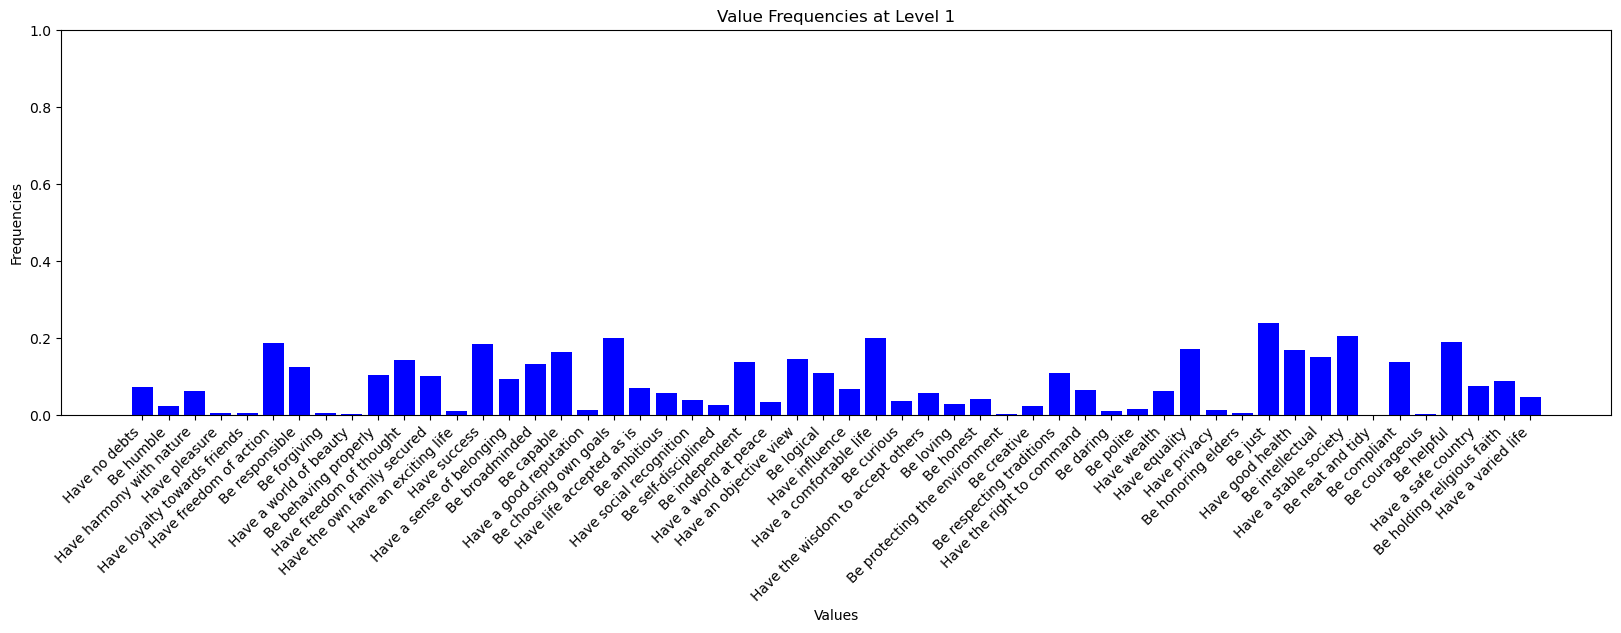

In [11]:
def plot_value_frequencies(value_frequencies, level):
    values = list(value_frequencies.keys())
    frequencies = list(value_frequencies.values())

    plt.figure(figsize=(20, 5))
    plt.bar(values, frequencies, color='blue')  # Creating a bar plot
    plt.xticks(rotation=45, ha='right')
    plt.ylim([0, 1])
    plt.xlabel('Values')
    plt.ylabel('Frequencies')
    plt.title(f'Value Frequencies at {level}')
    plt.show()

plot_value_frequencies(value_frequencies_usa_l1, "Level 1")

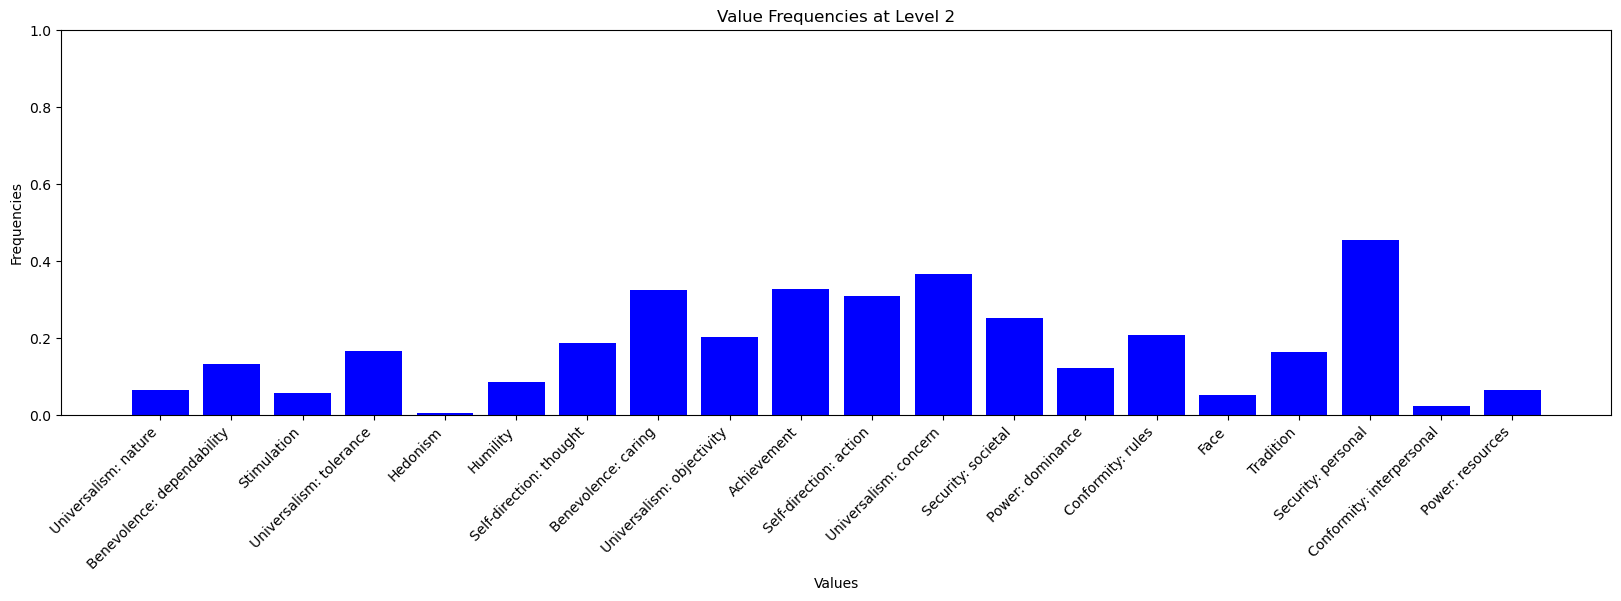

In [12]:
plot_value_frequencies(value_frequencies_usa_l2, "Level 2")

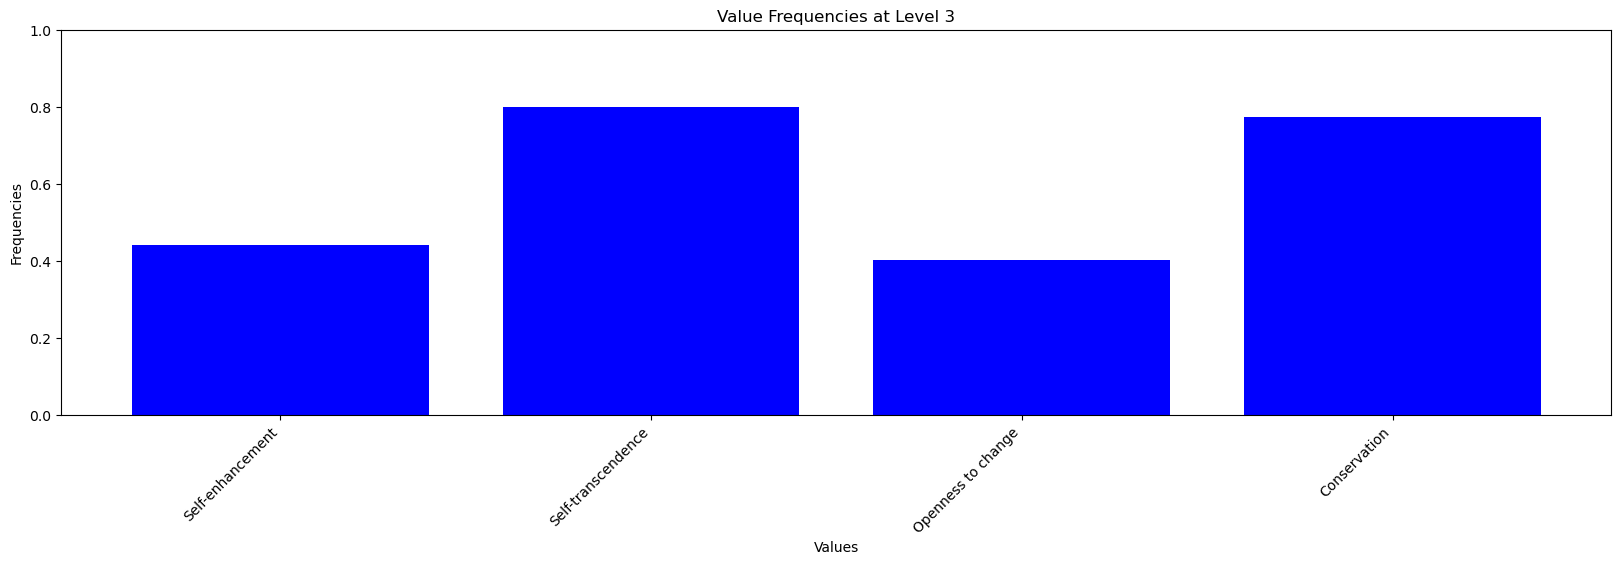

In [13]:
plot_value_frequencies(value_frequencies_usa_l3, "Level 3")

In [14]:
from IO import IO

def plot_frequencies_and_f1(value_frequencies, f1_overview, level):
    values = f1_overview[-1]["overview"]["usa"][level]["Per-value"].keys()

    frequencies = [value_frequencies[value] for value in values]
    f1_scores = [f1_overview[-1]["overview"]["usa"][level]["Per-value"][value] for value in values]

    plt.figure(figsize=(20, 5))
    plt.plot(values, f1_scores, marker='.', markersize=10, markerfacecolor='red', markeredgecolor='red')
    plt.bar(values, frequencies, color='blue')  # Creating a bar plot
    plt.xticks(rotation=45, ha='right')
    plt.ylim([0, 1])
    plt.xlabel('Values')
    plt.ylabel('F1-score')
    plt.title(f'Value Frequencies at {level}')
    plt.show()

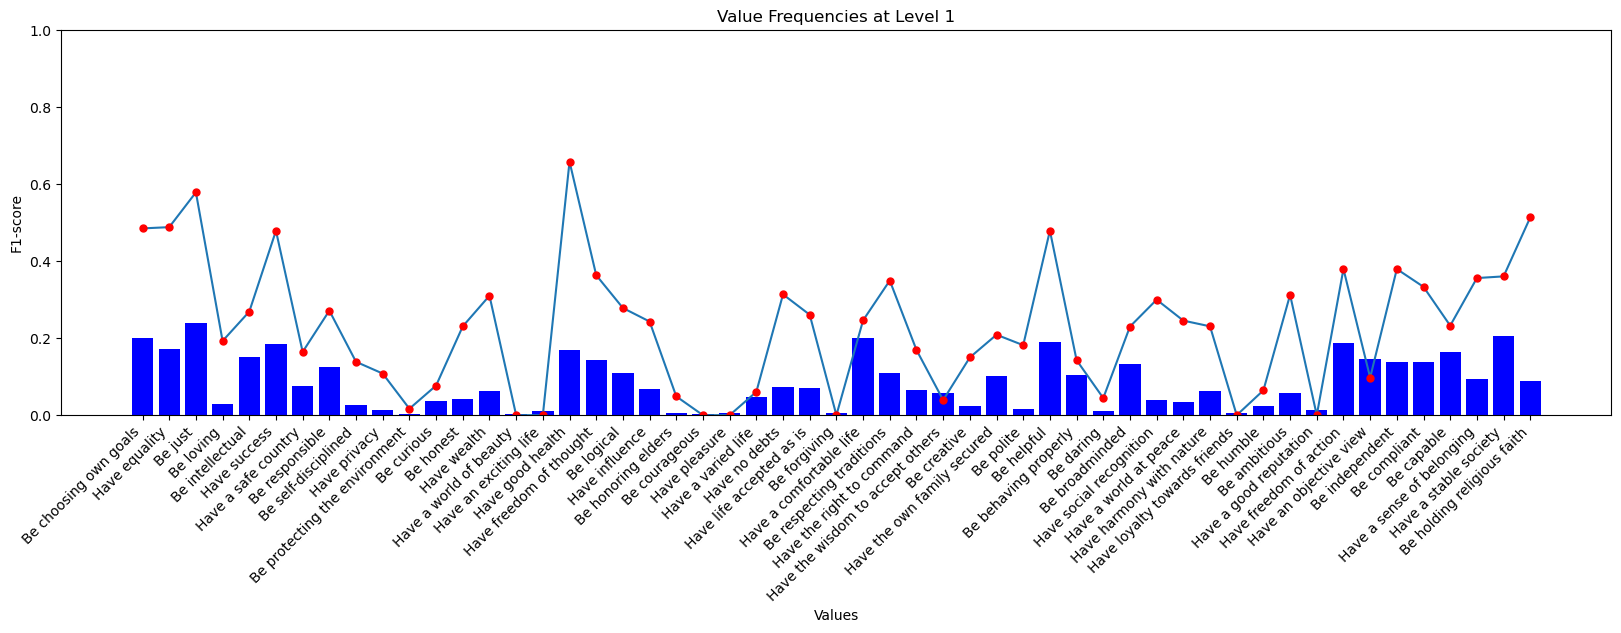

In [15]:
zero_shot_results = IO.read_f1_from_file("../results/Schwartz/Zero-shot/gpt-3.5-turbo-0125.txt")

plot_frequencies_and_f1(value_frequencies_usa_l1, zero_shot_results, "Level 1")

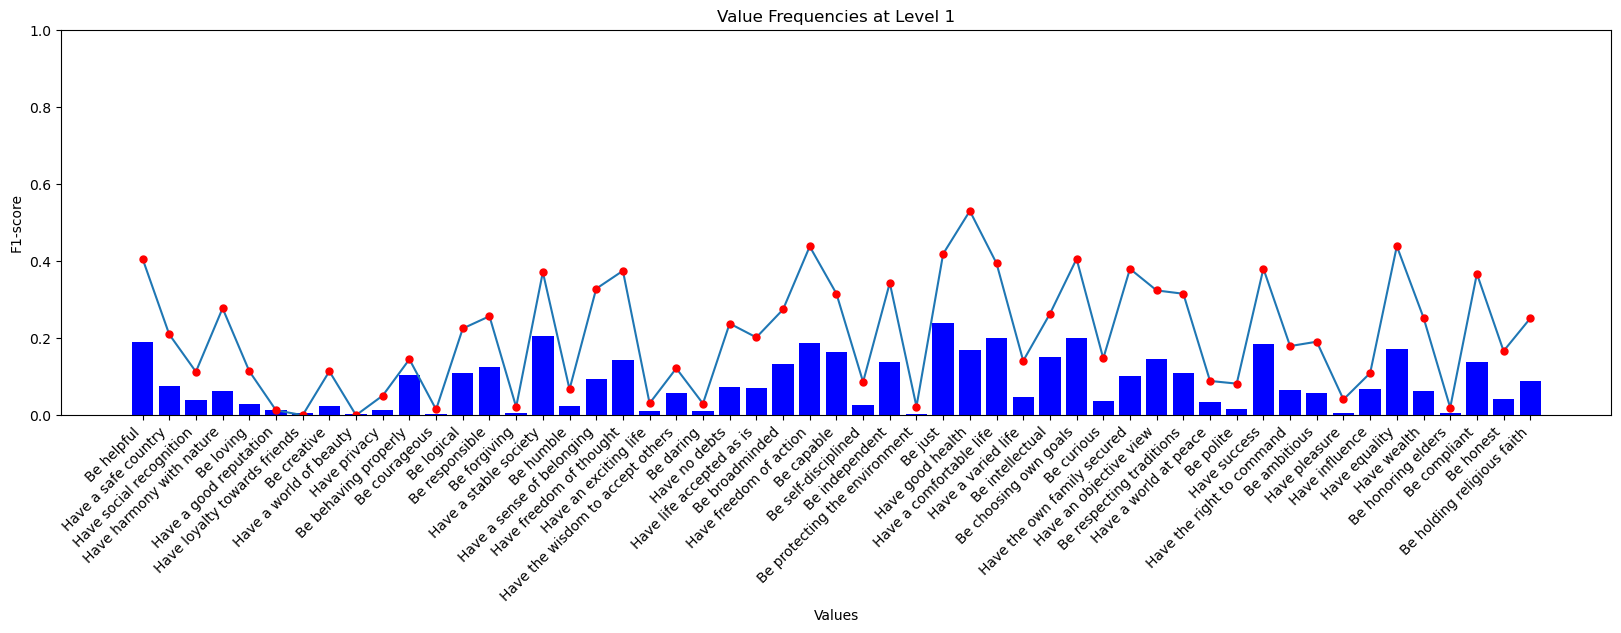

In [20]:
few_shot_results = IO.read_f1_from_file("../results/Schwartz/Few-shot-no-cot/gpt-3.5-turbo-0125-n20.txt")

plot_frequencies_and_f1(value_frequencies_usa_l1, few_shot_results, "Level 1")

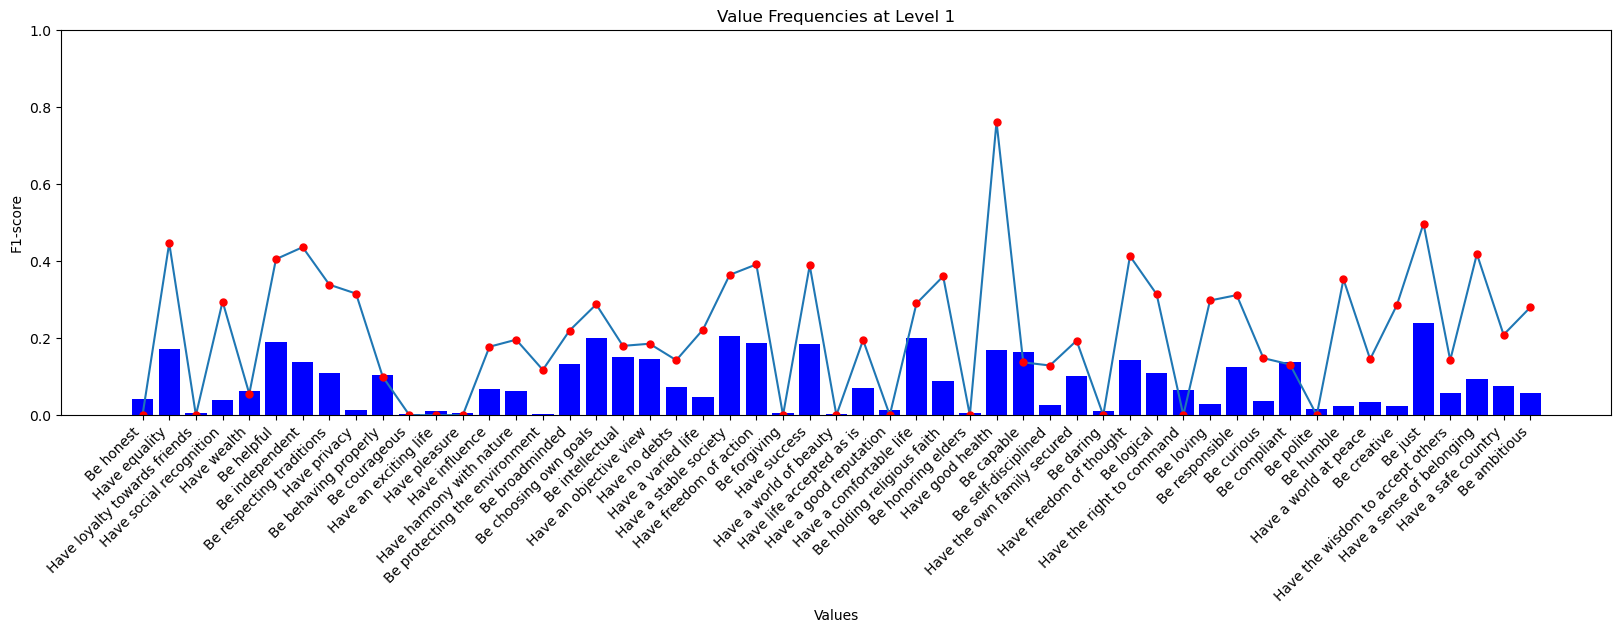

In [16]:
few_shot_cot_results = IO.read_f1_from_file("../results/Schwartz/Few-shot-cot/gpt-3.5-turbo-0125-n20.txt")

plot_frequencies_and_f1(value_frequencies_usa_l1, few_shot_cot_results, "Level 1")

In [35]:
def plot_all_l1(value_frequencies, zero_shot, few_shot, few_shot_cot):
    values = zero_shot[0]["overview"]["usa"]["Level 1"]["Per-value"].keys()

    frequencies = [value_frequencies[value] for value in values]
    zero_shot_f1 = [zero_shot[-1]["overview"]["usa"]["Level 1"]["Per-value"][value] for value in values]
    few_shot_f1 = [few_shot[-1]["overview"]["usa"]["Level 1"]["Per-value"][value] for value in values]
    few_shot_cot_f1 = [few_shot_cot[-1]["overview"]["usa"]["Level 1"]["Per-value"][value] for value in values]

    plt.figure(figsize=(20, 5))
    plt.plot(values, zero_shot_f1, marker='.', markersize=10, label='Zero-shot')
    plt.plot(values, few_shot_f1, marker='.', markersize=10, label='Few-shot')
    plt.plot(values, few_shot_cot_f1, marker='.', markersize=10, label='CoT')

    plt.bar(values, frequencies, color='grey')  # Creating a bar plot
    plt.xticks(rotation=45, ha='right')
    plt.ylim([0, 1])
    plt.xlabel('Value')
    plt.ylabel('F1-score')
    plt.legend()
    plt.title('Values (Level 1)')
    plt.savefig("../results/plot.png", dpi=300, bbox_inches='tight')
    plt.show()

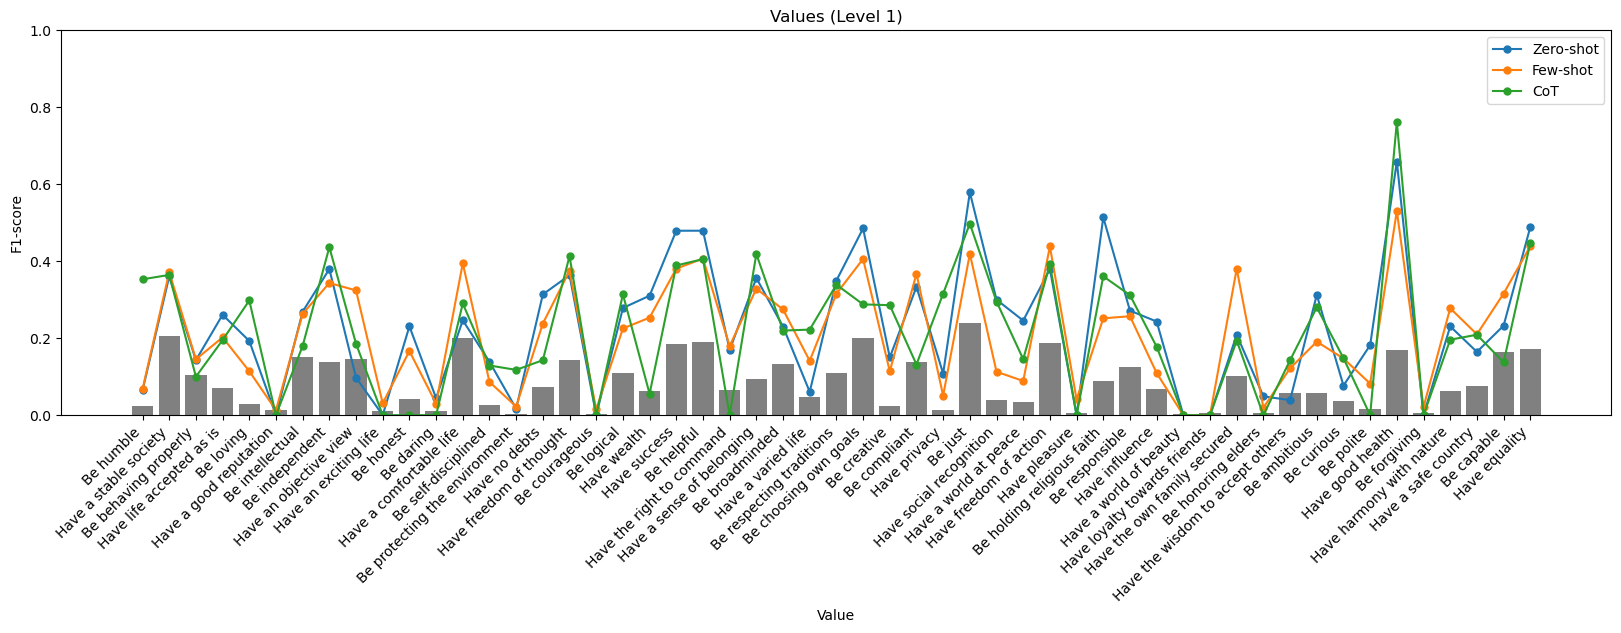

In [36]:
plot_all_l1(value_frequencies_usa_l1, zero_shot_results, few_shot_results, few_shot_cot_results)

In [39]:
def plot_all_l2(value_frequencies, zero_shot, few_shot, few_shot_cot):
    values = zero_shot[0]["overview"]["usa"]["Level 2"]["Per-value"].keys()

    frequencies = [value_frequencies[value] for value in values]
    zero_shot_f1 = [zero_shot[-1]["overview"]["usa"]["Level 2"]["Per-value"][value] for value in values]
    few_shot_f1 = [few_shot[-1]["overview"]["usa"]["Level 2"]["Per-value"][value] for value in values]
    few_shot_cot_f1 = [few_shot_cot[0]["overview"]["usa"]["Level 2"]["Per-value"][value] for value in values]

    plt.figure(figsize=(20, 5))
    plt.plot(values, zero_shot_f1, marker='.', markersize=10, label='Zero-shot')
    plt.plot(values, few_shot_f1, marker='.', markersize=10, label='Few-shot')
    plt.plot(values, few_shot_cot_f1, marker='.', markersize=10, label='CoT')

    plt.bar(values, frequencies, color='grey')  # Creating a bar plot
    plt.xticks(rotation=45, ha='right')
    plt.ylim([0, 1])
    plt.xlabel('Value category')
    plt.ylabel('F1-score')
    plt.legend()
    plt.title('Value categories (Level 2)')
    plt.savefig("../results/plot_l2.png", dpi=300, bbox_inches='tight')
    plt.show()

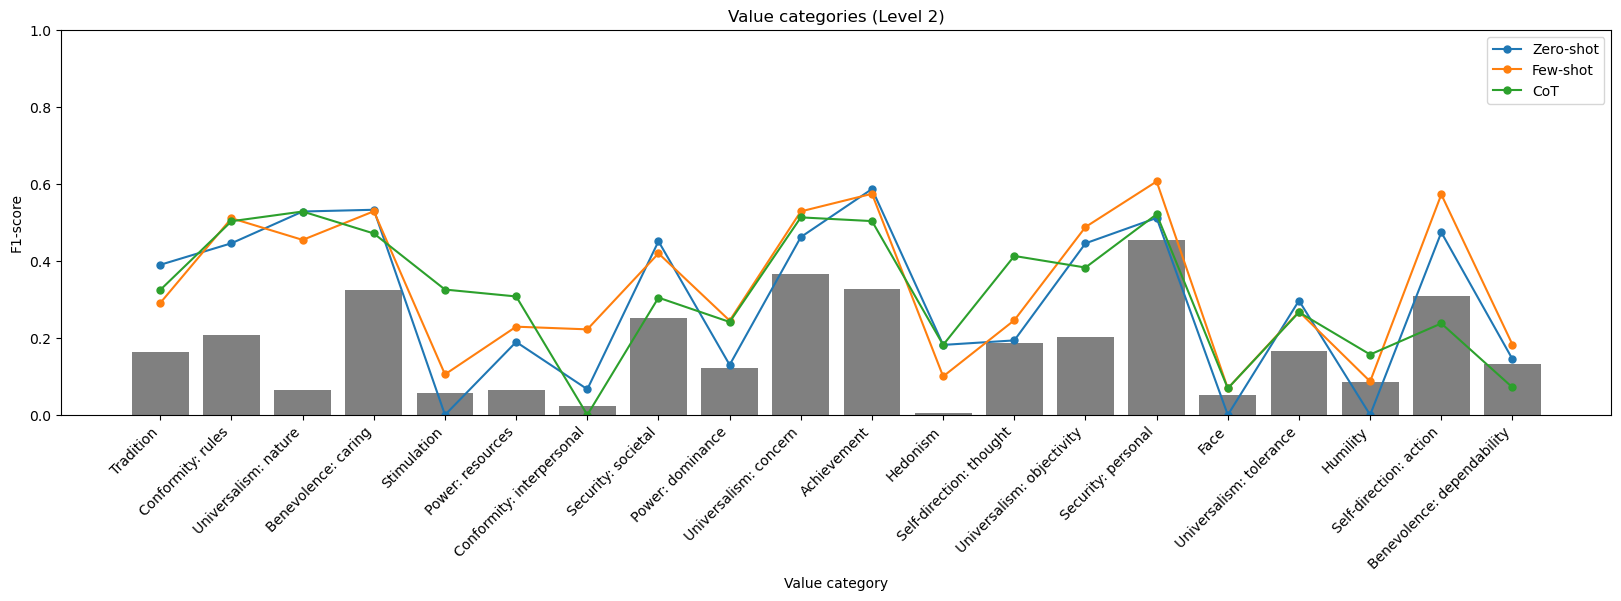

In [40]:
plot_all_l2(value_frequencies_usa_l2, zero_shot_results, few_shot_results, few_shot_cot_results)